# Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC


# Data Preparation

### Data Analysis

In [56]:
diabetics_df = pd.read_csv('diabetes.csv')
diabetics_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
diabetics_df['Outcome'] = diabetics_df['Outcome'].replace(0, -1)

In [58]:
# Outcome == 1 : has diabetes
# Outcome == -1: does not diabetes

number_of_data_per_class = diabetics_df['Outcome'].value_counts()
number_of_data_per_class

Outcome
-1    500
 1    268
Name: count, dtype: int64

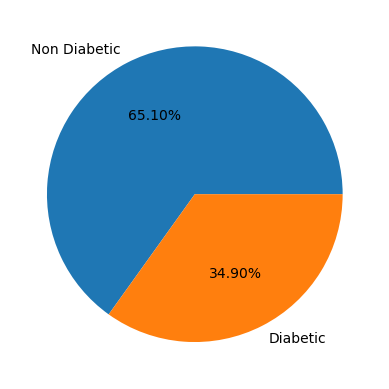

In [59]:
# Ploting bar chat with the above data
plt.xticks([1, -1,], ['Diabetic (1)', 'Non Diabetic (-1)'])
plt.pie(number_of_data_per_class, labels=['Non Diabetic', 'Diabetic'], autopct='%1.2f%%')
# plt.title('The percentage of data per class')
plt.show()

In [60]:
# Overall statictical description of the dataset shows that there is no null vaule in the dataset
# Here we can see that min value of the features [Glucose, BloodPressure, SkinThickness, Insulin, BMI] is 0.0 Which is not logically correct
# I will treat these values as mising value

diabetics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,-0.302083,0.953903,-1.000,-1.00000,-1.0000,1.00000,1.00


In [61]:
# Missing Value Handeling
zero_val_count = (diabetics_df == 0).sum()
print('Number of Missing Values: ')
print(zero_val_count.drop(['Outcome', 'Pregnancies']))

# For Pie chart
zero_val_count.drop(['Outcome', 'Pregnancies', 'Age', 'DiabetesPedigreeFunction'], inplace=True)


Number of Missing Values: 
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


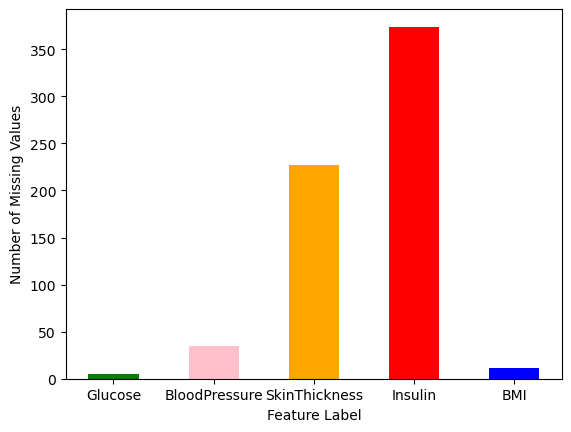

In [62]:
# Bar chart for missing values
plt.bar(zero_val_count.index, zero_val_count.values, width=0.5, color=['green', 'pink', 'orange', 'red', 'blue'])
plt.xlabel('Feature Label')
plt.ylabel('Number of Missing Values')
plt.show()

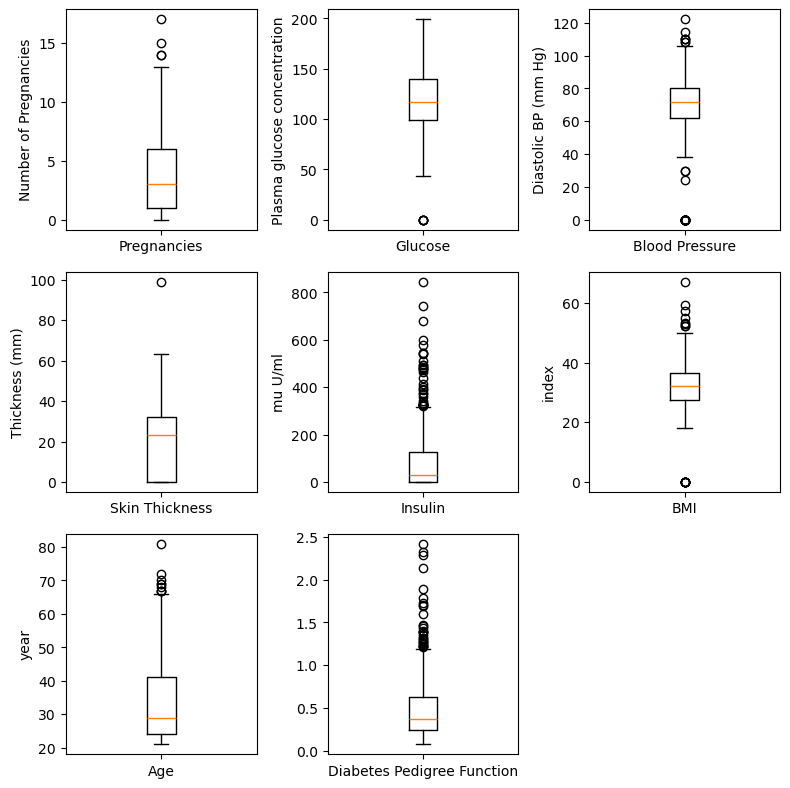

In [63]:
# Boxplot to show outliers in the data
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# R1
# Pregnancies 
axes[0][0].boxplot(diabetics_df['Pregnancies'], tick_labels=['Pregnancies'])
axes[0][0].set_ylabel('Number of Pregnancies')

# Glucose
axes[0][1].boxplot(diabetics_df['Glucose'], tick_labels=['Glucose'])
axes[0][1].set_ylabel('Plasma glucose concentration')

# Blood Pressure
axes[0][2].boxplot(diabetics_df['BloodPressure'], tick_labels=['Blood Pressure'])
axes[0][2].set_ylabel('Diastolic BP (mm Hg)')

# R2
# Skin Thickness
axes[1][0].boxplot(diabetics_df['SkinThickness'], tick_labels=['Skin Thickness'])
axes[1][0].set_ylabel('Thickness (mm)')

# Insulin
axes[1][1].boxplot(diabetics_df['Insulin'], tick_labels=['Insulin'])
axes[1][1].set_ylabel('mu U/ml')

# BMI
axes[1][2].boxplot(diabetics_df['BMI'], tick_labels=['BMI'])
axes[1][2].set_ylabel('index')

# R3
# Age
axes[2][0].boxplot(diabetics_df['Age'], tick_labels=['Age'])
axes[2][0].set_ylabel('year')

#Diabetes Pedigree Function
axes[2][1].boxplot(diabetics_df['DiabetesPedigreeFunction'], tick_labels=['Diabetes Pedigree Function'])

axes[2][2].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [64]:
# Replacing zero values with their median vaule
features_with_missing_value = ['Glucose', 'BloodPressure', 'SkinThickness',	'Insulin', 'BMI']

for feature in features_with_missing_value:
    mean_val = diabetics_df[feature].median()
    diabetics_df[feature] = diabetics_df[feature].replace(0, mean_val)

In [65]:
# Data Processing 
X = diabetics_df.drop('Outcome', axis=1)
Y = diabetics_df['Outcome']

# Spliting Data (80% training and 20% test)
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [66]:
print('Data Size in Train & Test Dataset: ')
print(X_train_raw.shape, y_train_raw.shape)
print(X_test_raw.shape, y_test_raw.shape)

Data Size in Train & Test Dataset: 
(614, 8) (614,)
(154, 8) (154,)


In [67]:
# Scaling the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

y_train = y_train_raw.to_numpy()
y_test = y_test_raw.to_numpy()

# Single Layer Perceptron 

In [68]:
# Sign function returns 1 if z (xw + b) >= 0 otherwise returns -1
def sign(z):
    return 1 if z >= 0 else -1

# Perceptron loss from the formula, l(x, y, w) = max{0, -y<x,w>}
def perceptron_loss(y, z):
    # here, y: true label z: <x,w> = xw + b
    return max(0, -y * z)

# Perception prediction from the formula, y_hat = f(x · w + b) 
# Here f is the sign function define above
def perceptron_model(x, w, b):
    z = np.dot(x, w) + b
    y_hat = sign(z)
    return z, y_hat

# Training the perceptron model
def train_model(epochs, step_size, X, y, w, b):
    for epoch in range(epochs):
        loss = 0
        y_pred = []
        for i in range(X.shape[0]):
            # Making Prediction
            z, y_hat = perceptron_model(X[i], w, b)
            # Calculating perceptron loss
            loss = loss + perceptron_loss(y[i], z)
            y_pred.append(y_hat)
            # Updating w and b if missclassified
            if y_hat != y[i]:
                w = w + step_size * y[i] * X[i]
                b = b + step_size * y[i]
        if (epoch + 1) % 1000 == 0:
            print(f'After epoch {epoch+1}, loss {loss:.2f}, accuracy {accuracy_score(y, y_pred):.2f}, recall {recall_score(y, y_pred):.2f}')
    return w, b

# Evaluating the performance
def test_model(X, y, w, b):
    y_pred = []
    for i in range(X.shape[0]):
        _, y_hat = perceptron_model(X[i], w, b)
        y_pred.append(y_hat)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)

    print(f'accuracy {accuracy:.2f}, recall {recall:.2f}  \nconfusion matrix: \n {confusion_matrix(y, y_pred)}')
    return accuracy, recall

In [69]:
# Hyperparameters 
epochs = 10000
step_size = 0.001

# initializing weights and bias
np.random.seed(41)
w = np.random.randn(X_train.shape[1]) # (n x 1)
b = np.random.randn()

print('Training Perceptron Model: ')
final_w, final_b = train_model(epochs, step_size, X_train, y_train, w, b)

Training Perceptron Model: 
After epoch 1000, loss 0.88, accuracy 0.69, recall 0.55
After epoch 2000, loss 0.93, accuracy 0.68, recall 0.54
After epoch 3000, loss 0.92, accuracy 0.70, recall 0.57
After epoch 4000, loss 0.94, accuracy 0.69, recall 0.55
After epoch 5000, loss 0.89, accuracy 0.69, recall 0.55
After epoch 6000, loss 0.93, accuracy 0.69, recall 0.54
After epoch 7000, loss 0.93, accuracy 0.68, recall 0.54
After epoch 8000, loss 0.85, accuracy 0.70, recall 0.56
After epoch 9000, loss 0.86, accuracy 0.71, recall 0.57
After epoch 10000, loss 0.89, accuracy 0.70, recall 0.56


In [70]:
# Performance on test data
acc, rec = test_model(X_test, y_test, final_w, final_b)

accuracy 0.74, recall 0.62  
confusion matrix: 
 [[80 19]
 [21 34]]


# Experiment

Experiment with different step size

In [71]:
# Trying different step size to checks models learning 
step_sizes = [0.0001, 0.001, 0.01, 0.1]

for step_size in step_sizes:
    print(f'Training model with step size {step_size}: ')
    print()
    temp_w, temp_b = train_model(epochs, step_size, X_train, y_train, w, b)
    print()
    print('Performance on test data: ')
    test_model(X_test, y_test, temp_w, temp_b)
    print('==============================================================================================')

Training model with step size 0.0001: 

After epoch 1000, loss 0.09, accuracy 0.70, recall 0.56
After epoch 2000, loss 0.09, accuracy 0.70, recall 0.56
After epoch 3000, loss 0.09, accuracy 0.69, recall 0.55
After epoch 4000, loss 0.08, accuracy 0.70, recall 0.56
After epoch 5000, loss 0.08, accuracy 0.71, recall 0.58
After epoch 6000, loss 0.08, accuracy 0.71, recall 0.58
After epoch 7000, loss 0.10, accuracy 0.68, recall 0.54
After epoch 8000, loss 0.09, accuracy 0.70, recall 0.56
After epoch 9000, loss 0.09, accuracy 0.69, recall 0.56
After epoch 10000, loss 0.09, accuracy 0.70, recall 0.56

Performance on test data: 
accuracy 0.79, recall 0.56  
confusion matrix: 
 [[91  8]
 [24 31]]
Training model with step size 0.001: 

After epoch 1000, loss 0.88, accuracy 0.69, recall 0.55
After epoch 2000, loss 0.93, accuracy 0.68, recall 0.54
After epoch 3000, loss 0.92, accuracy 0.70, recall 0.57
After epoch 4000, loss 0.94, accuracy 0.69, recall 0.55
After epoch 5000, loss 0.89, accuracy 0.

Experiment with different weights and bias value initialization

In [72]:
# here I am using step size (eta) = 0.001. As from the above expriment we can see step size (eta) = 0.001 gives the higher recall value and moderate accuray.
step_size = 0.001

# initializing weights and bias value to zero
init_w = np.zeros(X_train.shape[1]) # (n x 1)
init_b = 0.0

print(f'Training model with initial weights and bias set to zero: ')
temp_w, temp_b = train_model(epochs, step_size, X_train, y_train, init_w, init_b) 
print()
print('Performance on test data: ')
test_model(X_test, y_test, temp_w, temp_b)
print()

Training model with initial weights and bias set to zero: 
After epoch 1000, loss 0.96, accuracy 0.66, recall 0.52
After epoch 2000, loss 0.86, accuracy 0.70, recall 0.56
After epoch 3000, loss 0.88, accuracy 0.69, recall 0.55
After epoch 4000, loss 0.83, accuracy 0.71, recall 0.58
After epoch 5000, loss 0.86, accuracy 0.71, recall 0.58
After epoch 6000, loss 0.94, accuracy 0.68, recall 0.53
After epoch 7000, loss 0.89, accuracy 0.69, recall 0.56
After epoch 8000, loss 0.85, accuracy 0.70, recall 0.56
After epoch 9000, loss 0.89, accuracy 0.69, recall 0.56
After epoch 10000, loss 0.88, accuracy 0.70, recall 0.56

Performance on test data: 
accuracy 0.75, recall 0.35  
confusion matrix: 
 [[96  3]
 [36 19]]



In [73]:
# choosing different random seed values for weight and bias initialization (different initialization value for w & b)

seeds = [0, 5, 13, 42, 51]

for s in seeds:
    np.random.seed(s)
    w = np.random.randn(X_train.shape[1])
    b = np.random.randn()

    print(f'Training model with seed value {s}: ')
    print()
    temp_w, temp_b = train_model(epochs, step_size, X_train, y_train, w, b)
    print()
    print('Performance on test data: ')
    test_model(X_test, y_test, temp_w, temp_b)
    print('==============================================================================================')


Training model with seed value 0: 

After epoch 1000, loss 0.93, accuracy 0.68, recall 0.54
After epoch 2000, loss 0.89, accuracy 0.69, recall 0.56
After epoch 3000, loss 0.88, accuracy 0.70, recall 0.57
After epoch 4000, loss 0.90, accuracy 0.69, recall 0.56
After epoch 5000, loss 0.88, accuracy 0.69, recall 0.56
After epoch 6000, loss 0.87, accuracy 0.69, recall 0.56
After epoch 7000, loss 0.91, accuracy 0.70, recall 0.57
After epoch 8000, loss 0.91, accuracy 0.70, recall 0.56
After epoch 9000, loss 0.85, accuracy 0.70, recall 0.57
After epoch 10000, loss 0.90, accuracy 0.70, recall 0.57

Performance on test data: 
accuracy 0.70, recall 0.38  
confusion matrix: 
 [[87 12]
 [34 21]]
Training model with seed value 5: 

After epoch 1000, loss 0.85, accuracy 0.70, recall 0.57
After epoch 2000, loss 0.85, accuracy 0.70, recall 0.56
After epoch 3000, loss 0.83, accuracy 0.70, recall 0.56
After epoch 4000, loss 0.86, accuracy 0.70, recall 0.58
After epoch 5000, loss 0.88, accuracy 0.69, rec

Experiment with different feature scaling techniques

In [74]:
# Scaling the data using RobustScaler as it is not influenced by the outliars in data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

y_train = y_train_raw.to_numpy()
y_test = y_test_raw.to_numpy()

# Hyperparameters 
epochs = 10000
step_size = 0.001

# initializing weights and bias
# Here I am using seed value 42 as from the above experiment we can see seed = 42 gives the higher recall value.
np.random.seed(42)
w = np.random.randn(X_train.shape[1]) # (n x 1)
b = np.random.randn()

print('Training Model: ')
temp_w, temp_b = train_model(epochs, step_size, X_train, y_train, w, b)
print()
print('Performance on test data: ')
test_model(X_test, y_test, temp_w, temp_b)
print()

Training Model: 
After epoch 1000, loss 0.75, accuracy 0.69, recall 0.54
After epoch 2000, loss 0.77, accuracy 0.68, recall 0.54
After epoch 3000, loss 0.81, accuracy 0.68, recall 0.54
After epoch 4000, loss 0.81, accuracy 0.70, recall 0.57
After epoch 5000, loss 0.83, accuracy 0.69, recall 0.55
After epoch 6000, loss 0.84, accuracy 0.68, recall 0.54
After epoch 7000, loss 0.83, accuracy 0.68, recall 0.54
After epoch 8000, loss 0.80, accuracy 0.68, recall 0.54
After epoch 9000, loss 0.82, accuracy 0.69, recall 0.56
After epoch 10000, loss 0.79, accuracy 0.69, recall 0.55

Performance on test data: 
accuracy 0.76, recall 0.67  
confusion matrix: 
 [[80 19]
 [18 37]]



In [75]:
# Kfold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameters 
epochs = 10000
step_size = 0.001

# initializing weights and bias
# Here I am using seed value 42 as from the above experiment we can see seed = 42 gives the higher recall value.
np.random.seed(42)
w = np.random.randn(X_train.shape[1]) # (n x 1)
b = np.random.randn()

accuracy_lst = []
recall_lst = []

X_numpy = X.to_numpy()
Y_numpy = Y.to_numpy()

for fold, (train_index, test_index) in enumerate(kf.split(X_numpy)):
    print(f'For fold {fold+1}: ')
    X_train, X_test, y_train, y_test = X_numpy[train_index], X_numpy[test_index], Y_numpy[train_index], Y_numpy[test_index]

    # Feature scaling
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Model Training
    print('Training Model: ')
    temp_w, temp_b = train_model(epochs, step_size, X_train, y_train, w, b)
    print()
    print('Performance on test data: ')
    acc, recall = test_model(X_test, y_test, temp_w, temp_b)
    accuracy_lst.append(acc)
    recall_lst.append(recall)
    print("===============================================================================================")
    

print(f'Mean accuracy {np.mean(accuracy_lst):.2f}, and standard deviation {np.std(accuracy_lst):.2f}')
print(f'Mean recall {np.mean(recall_lst):.2f} and standard deviation {np.std(recall_lst):.2f}')

For fold 1: 
Training Model: 
After epoch 1000, loss 0.74, accuracy 0.70, recall 0.57
After epoch 2000, loss 0.77, accuracy 0.70, recall 0.57
After epoch 3000, loss 0.70, accuracy 0.71, recall 0.57
After epoch 4000, loss 0.73, accuracy 0.72, recall 0.59
After epoch 5000, loss 0.78, accuracy 0.70, recall 0.57
After epoch 6000, loss 0.78, accuracy 0.70, recall 0.57
After epoch 7000, loss 0.67, accuracy 0.73, recall 0.61
After epoch 8000, loss 0.81, accuracy 0.70, recall 0.57
After epoch 9000, loss 0.74, accuracy 0.70, recall 0.57
After epoch 10000, loss 0.77, accuracy 0.70, recall 0.57

Performance on test data: 
accuracy 0.70, recall 0.73  
confusion matrix: 
 [[68 31]
 [15 40]]
For fold 2: 
Training Model: 
After epoch 1000, loss 0.84, accuracy 0.69, recall 0.57
After epoch 2000, loss 0.86, accuracy 0.69, recall 0.57
After epoch 3000, loss 0.84, accuracy 0.69, recall 0.57
After epoch 4000, loss 0.89, accuracy 0.70, recall 0.58
After epoch 5000, loss 0.89, accuracy 0.69, recall 0.57
Aft

Comparison with available models

In [76]:
# Here I am using the methods and hyperparameter values with which perceptron model achieve best accuracy and recall score

# Hyperparameters 
epochs = 10000
step_size = 0.001

X_numpy = X.to_numpy()
Y_numpy = Y.to_numpy()


In [77]:
# Comparison with sklearn perceptron model using K fold
sk_perceptron = Perceptron(max_iter=epochs, eta0=step_size)

accuracy_lst = []
recall_lst = []

for train_index, test_index in kf.split(X_numpy):
    X_train, X_test, y_train, y_test = X_numpy[train_index], X_numpy[test_index], Y_numpy[train_index], Y_numpy[test_index]

    # Feature scaling
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Model Training
    sk_perceptron.fit(X_train, y_train)

    # Making Prediction
    y_pred = sk_perceptron.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracy_lst.append(acc)
    recall_lst.append(recall)

print('Sk-learn model\'s performance on test data: ')
print(f'Mean accuracy {np.mean(accuracy_lst):.2f}, and standard deviation {np.std(accuracy_lst):.2f}')
print(f'Mean recall {np.mean(recall_lst):.2f} and standard deviation {np.std(recall_lst):.2f}')


Sk-learn model's performance on test data: 
Mean accuracy 0.71, and standard deviation 0.04
Mean recall 0.58 and standard deviation 0.17


In [78]:
# Comparison with SVM model
svm_model = SVC(kernel='linear', max_iter=epochs)

accuracy_lst = []
recall_lst = []

for train_index, test_index in kf.split(X_numpy):
    X_train, X_test, y_train, y_test = X_numpy[train_index], X_numpy[test_index], Y_numpy[train_index], Y_numpy[test_index]

    # Feature scaling
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Model Training
    svm_model.fit(X_train, y_train)

    # Making Prediction
    y_pred = svm_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    accuracy_lst.append(acc)
    recall_lst.append(recall)

print('SVM model\'s performance on test data: ')
print(f'Mean accuracy {np.mean(accuracy_lst):.2f}, and standard deviation {np.std(accuracy_lst):.2f}')
print(f'Mean recall {np.mean(recall_lst):.2f} and standard deviation {np.std(recall_lst):.2f}')

SVM model's performance on test data: 
Mean accuracy 0.77, and standard deviation 0.01
Mean recall 0.56 and standard deviation 0.04
